# Tests for Portfolio VaR Functions

In [110]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.express as px
import yfinance as yf

# Import functions
import portfolio_var as pv
import plots as pl
import expected_shortfall as ES

### Asset Normal/ Undiversified VaR

**NOTE**: since we already have the parametric VaR, a Portfolio-Normal VaR function is redundant. Portfolio-Normal is exactly like parametric VaR (which we have), and that can be backtested and ES can be done (add note about that).

In [111]:
# Set parameters
confidence_level = 0.99
holding_period = 1

In [112]:
# Step 1: Download prices
tickers = ["^GSPC", "^STOXX50E", "^N225", "DJI", "EEM"]
data = yf.download(tickers, start="2020-01-01", end="2025-01-01")["Close"]
data = data.dropna()

# Step 2: Define fixed quantities
quantities = pd.Series([10, 80, 30, 50, -10], index=tickers)

# Step 3: Compute monetary positions
position_data = data.multiply(quantities, axis=1)

[*********************100%***********************]  5 of 5 completed


In [113]:
position_data.head()

,DJI,EEM,^GSPC,^N225,^STOXX50E
Date,,,,,
2020-01-06,1.435170e+06,-401.937218,32462.800293,696145.781250,300201.601562
2020-01-07,1.429185e+06,-401.668243,32371.799316,707271.621094,300740.000000
2020-01-08,1.437255e+06,-403.999901,32530.500488,696142.792969,301804.804688
2020-01-09,1.447845e+06,-406.690140,32746.999512,712196.074219,303670.390625
2020-01-10,1.441190e+06,-408.842506,32653.500977,715517.109375,303161.601562


In [114]:
# Compute and display the summary
summary_df = pv.var_asset_normal(position_data)

In [115]:
summary_df.head()

,Diversified_VaR,Undiversified_VaR,Diversification_Benefit
Date,,,
2020-01-07,83035.440598,98466.766716,15431.326118
2020-01-08,83166.065354,98472.306128,15306.240774
2020-01-09,83995.755195,99562.210383,15566.455189
2020-01-10,83778.415460,99370.048063,15591.632603
2020-01-14,84091.346657,99760.595080,15669.248422


### Marginal VaR

In [116]:
# Compute and display Marginal VaR (styled table)
marginal_df = pv.marginal_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [117]:
marginal_df.head()

,DJI,EEM,^GSPC,^N225,^STOXX50E
Date,,,,,
2020-01-07,0.040215,0.033603,0.036970,0.021056,0.031540
2020-01-08,0.040282,0.033633,0.037036,0.020917,0.031535
2020-01-09,0.040235,0.033611,0.036989,0.021017,0.031533
2020-01-10,0.040205,0.033598,0.036960,0.021077,0.031539
2020-01-14,0.040198,0.033592,0.036953,0.021098,0.031525


### Incremental, Component and Relative Component VaR

In [118]:
# Compute and display Component VaR (styled table)
component_df = pv.component_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)

In [119]:
component_df.head()

,DJI,EEM,^GSPC,^N225,^STOXX50E
Date,,,,,
2020-01-07,57474.511402,-13.497330,1196.780265,14892.385153,9485.261108
2020-01-08,57896.071776,-13.587822,1204.784912,14561.532435,9517.264052
2020-01-09,58254.030137,-13.669325,1211.292570,14968.333090,9575.768723
2020-01-10,57942.838463,-13.736460,1206.876724,15080.955030,9561.481702
2020-01-14,58165.313858,-13.869462,1213.231836,15206.500971,9520.169454


In [120]:
rcvar_df = pv.relative_component_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [121]:
rcvar_df.head()

,DJI,EEM,^GSPC,^N225,^STOXX50E
Date,,,,,
2020-01-07,0.692168,-0.000163,0.014413,0.179350,0.114231
2020-01-08,0.696150,-0.000163,0.014486,0.175090,0.114437
2020-01-09,0.693535,-0.000163,0.014421,0.178203,0.114003
2020-01-10,0.691620,-0.000164,0.014406,0.180010,0.114128
2020-01-14,0.691692,-0.000165,0.014428,0.180833,0.113212


In [123]:
# Define change in position
change_vector = [0, 10000, 0, 0, 0]  # Increase Asset_B by 100 units

# Compute and display Incremental VaR
ivar_series = pv.incremental_var(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=0.99,
    holding_period=1,
)

In [124]:
ivar_series.head()

Date
2020-01-07    336.031792
2020-01-08    336.332300
2020-01-09    336.111542
2020-01-10    335.984144
2020-01-14    335.921584
dtype: float64

# ES Test

In [125]:
# Compute and display Marginal VaR (styled table)
marginal_es_df = ES.marginal_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [126]:
marginal_es_df.head()

,DJI,EEM,^GSPC,^N225,^STOXX50E
Date,,,,,
2020-01-07,0.046073,0.038498,0.042355,0.024123,0.036134
2020-01-08,0.046150,0.038532,0.042430,0.023964,0.036128
2020-01-09,0.046096,0.038507,0.042377,0.024079,0.036127
2020-01-10,0.046061,0.038493,0.042344,0.024147,0.036133
2020-01-14,0.046053,0.038485,0.042336,0.024171,0.036117


In [127]:
# Compute and display Component VaR (styled table)
component_es_df = ES.component_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)

In [128]:
component_es_df.head()

,DJI,EEM,^GSPC,^N225,^STOXX50E
Date,,,,,
2020-01-07,65846.508514,-15.463412,1371.108688,17061.677288,10866.927114
2020-01-08,66329.475278,-15.567085,1380.279328,16682.631067,10903.591751
2020-01-09,66739.575472,-15.660461,1387.734921,17148.688144,10970.618477
2020-01-10,66383.054213,-15.737375,1382.675843,17277.715105,10954.250344
2020-01-14,66637.936379,-15.889750,1389.956669,17421.548635,10906.920367


In [129]:
res_df = ES.relative_component_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
)


In [130]:
res_df.head()

,DJI,EEM,^GSPC,^N225,^STOXX50E
Date,,,,,
2020-01-07,0.692168,-0.000163,0.014413,0.179350,0.114231
2020-01-08,0.696150,-0.000163,0.014486,0.175090,0.114437
2020-01-09,0.693535,-0.000163,0.014421,0.178203,0.114003
2020-01-10,0.691620,-0.000164,0.014406,0.180010,0.114128
2020-01-14,0.691692,-0.000165,0.014428,0.180833,0.113212


In [131]:
# Define change in position
change_vector = [0, 10000, 0, 0, 0]  # Increase Asset_B by 100 units

# Compute and display Incremental VaR
ies_series = ES.incremental_es(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=0.99,
    holding_period=1,
)

In [132]:
ies_series.head()

Date
2020-01-07    384.979701
2020-01-08    385.323983
2020-01-09    385.071069
2020-01-10    384.925113
2020-01-14    384.853440
dtype: float64

### Visualizations

Here add linea tratteggiata like in the other plots to visualize interactively


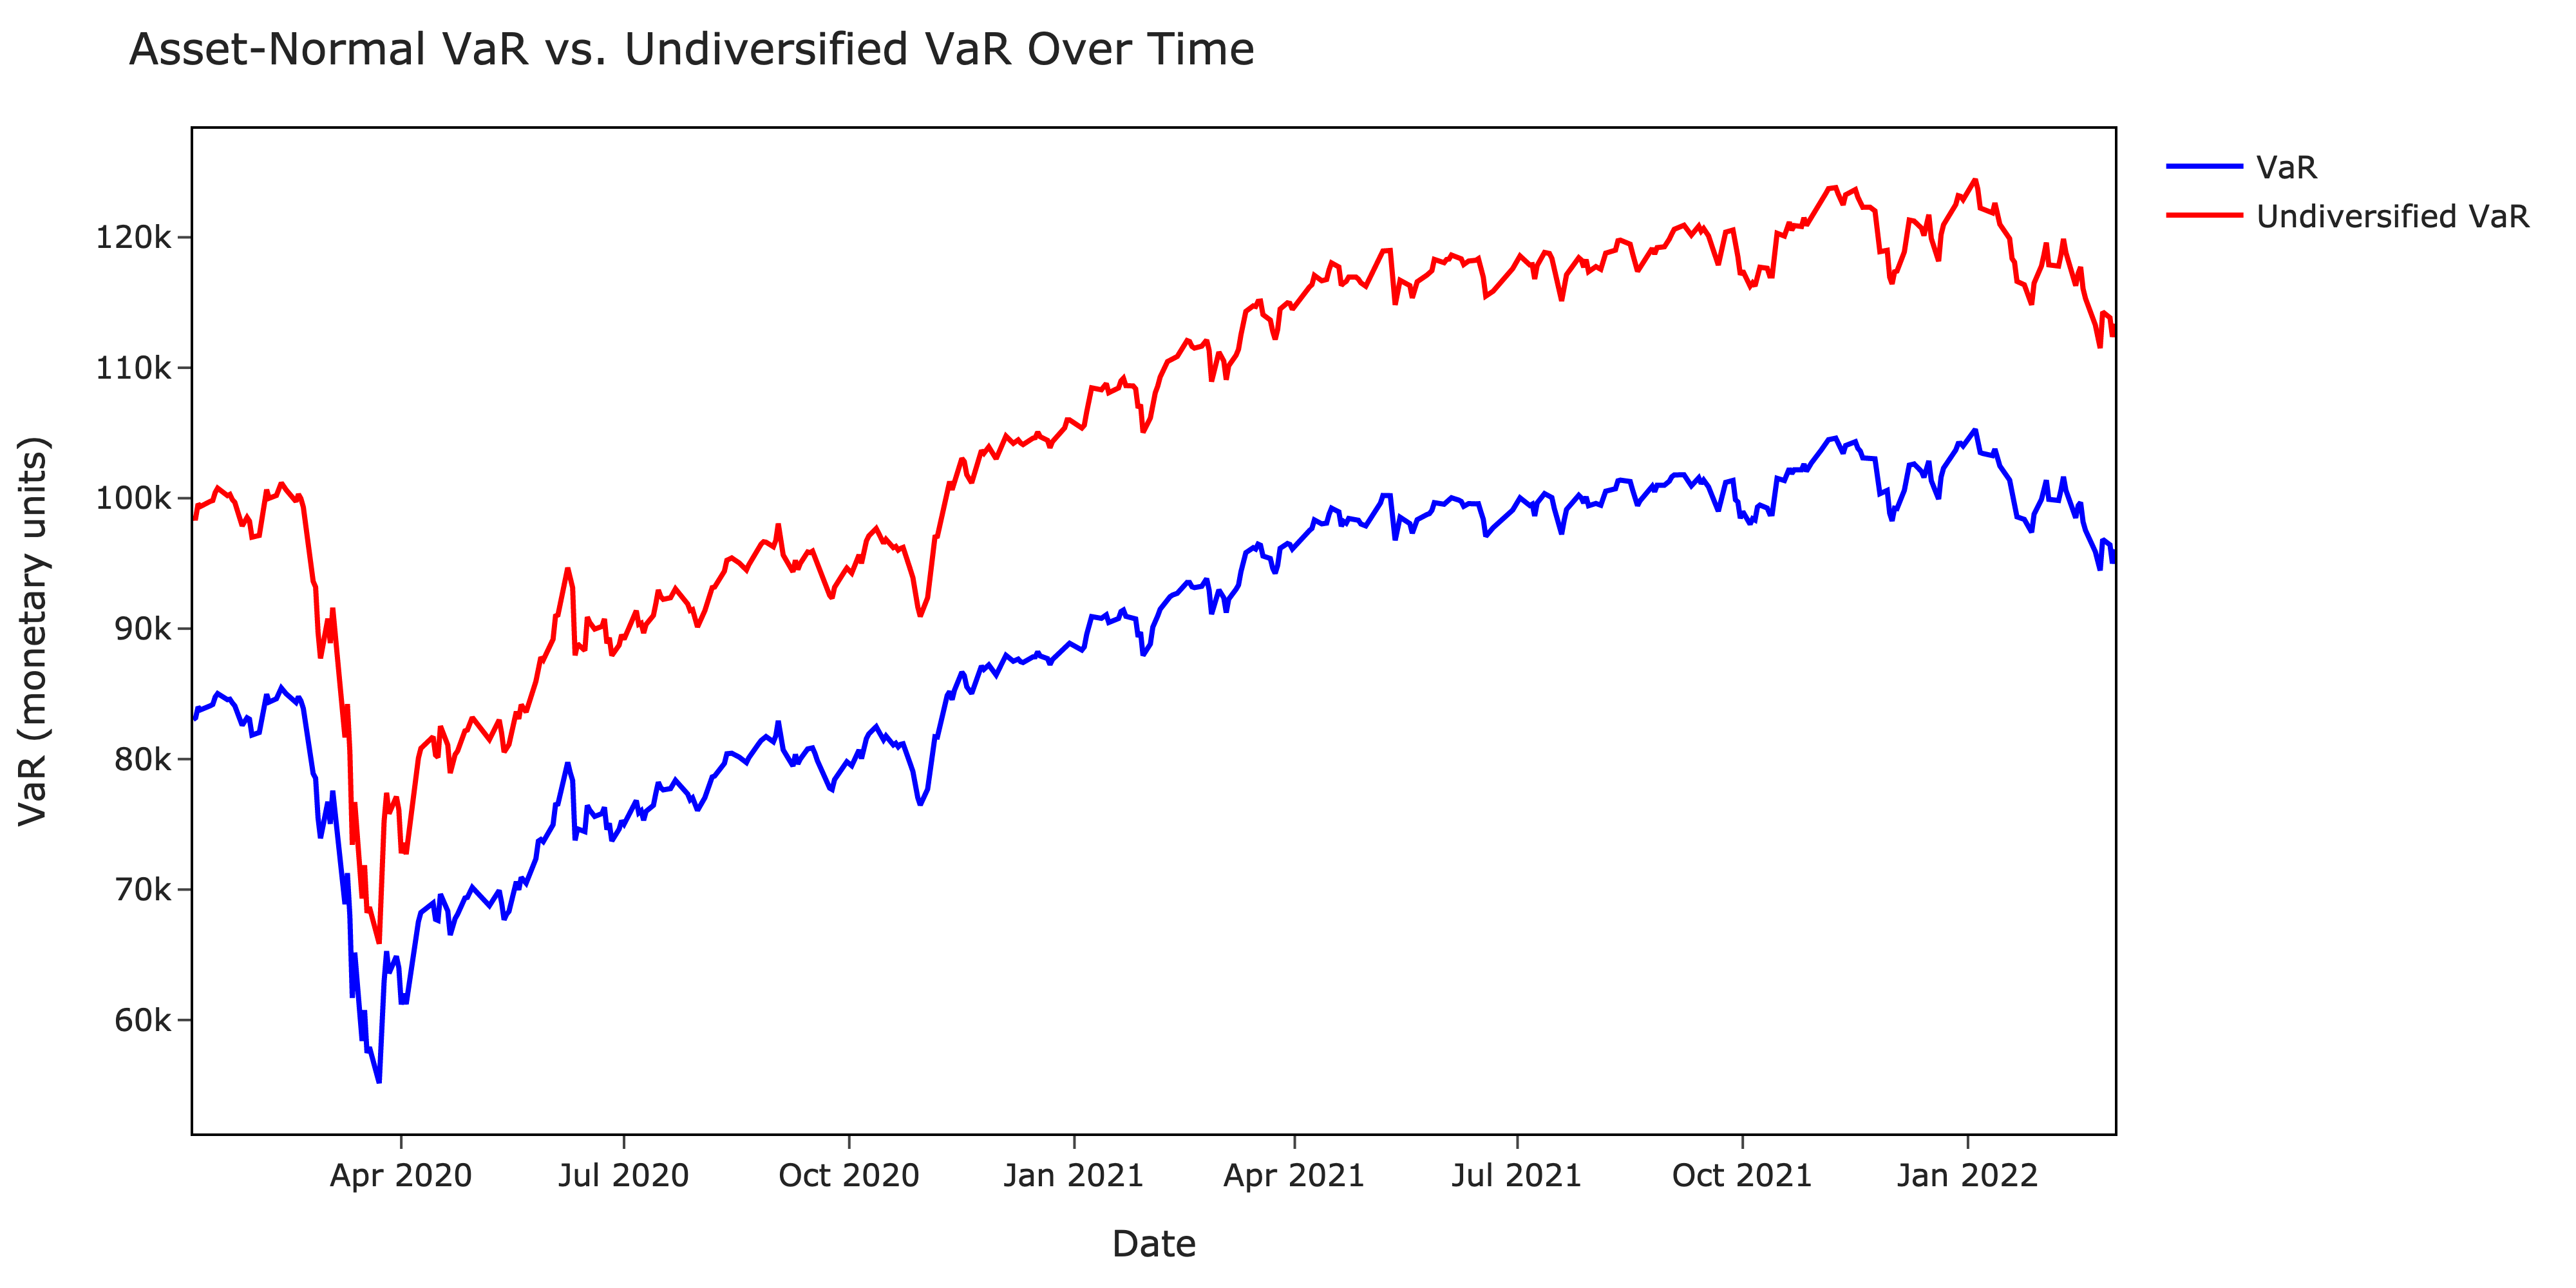

In [133]:
pl.plot_var_series(summary_df, interactive=False)


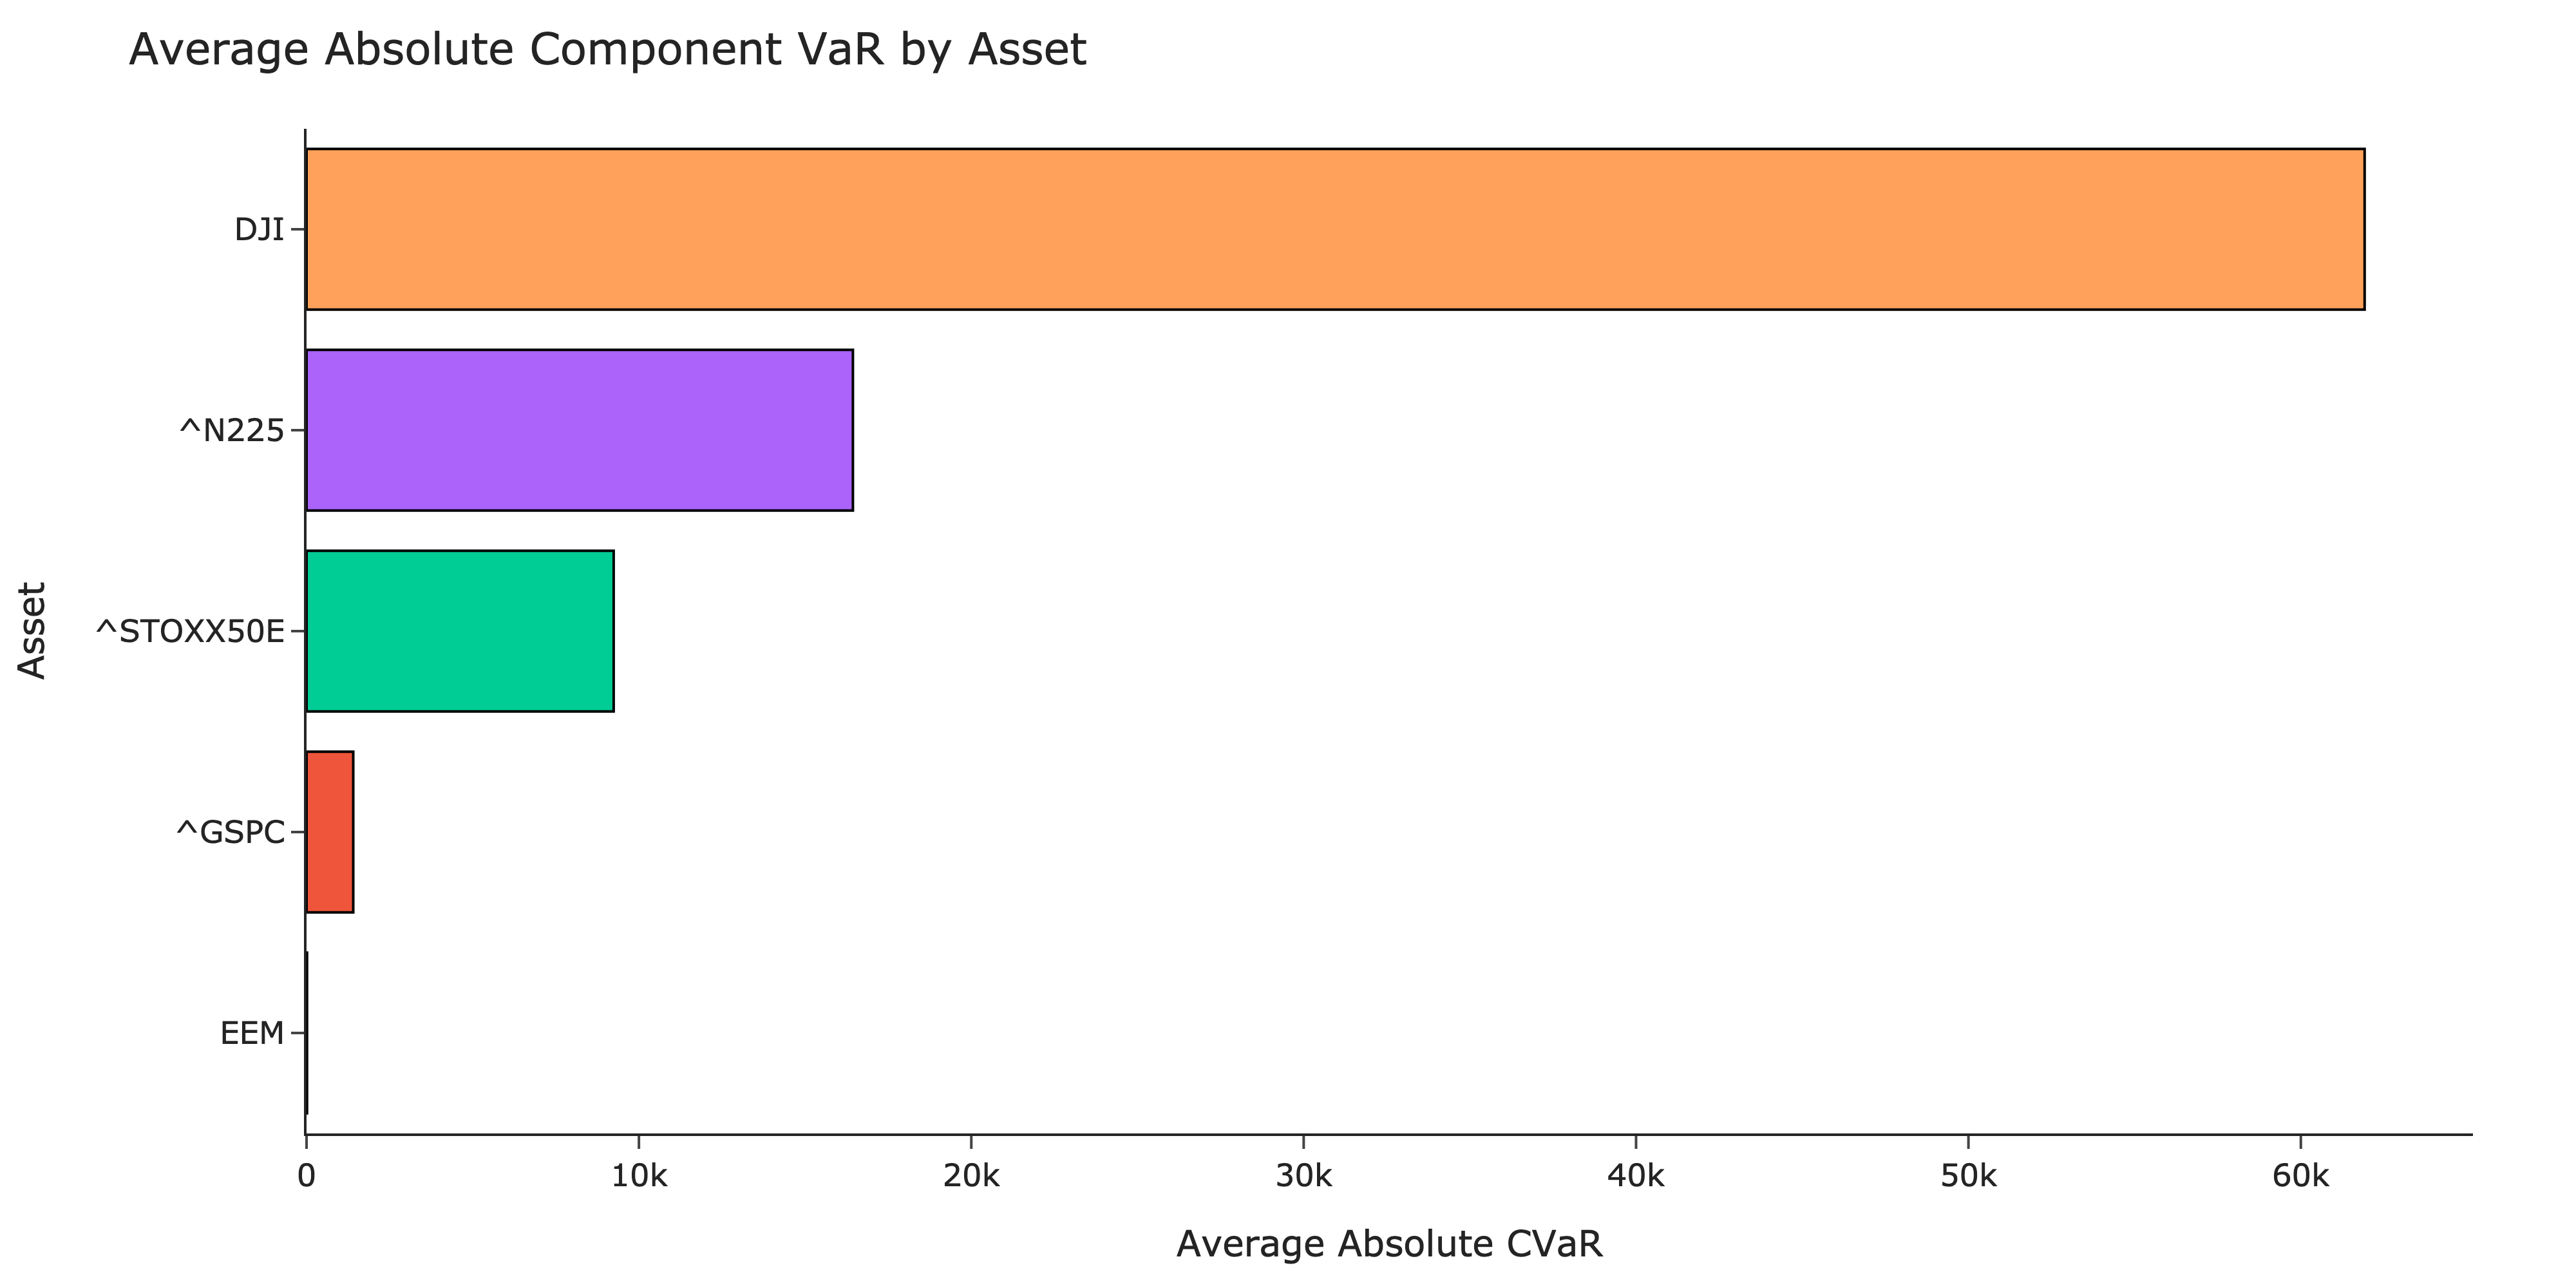

In [134]:
pl.plot_risk_contribution_bar(component_df, interactive=False)


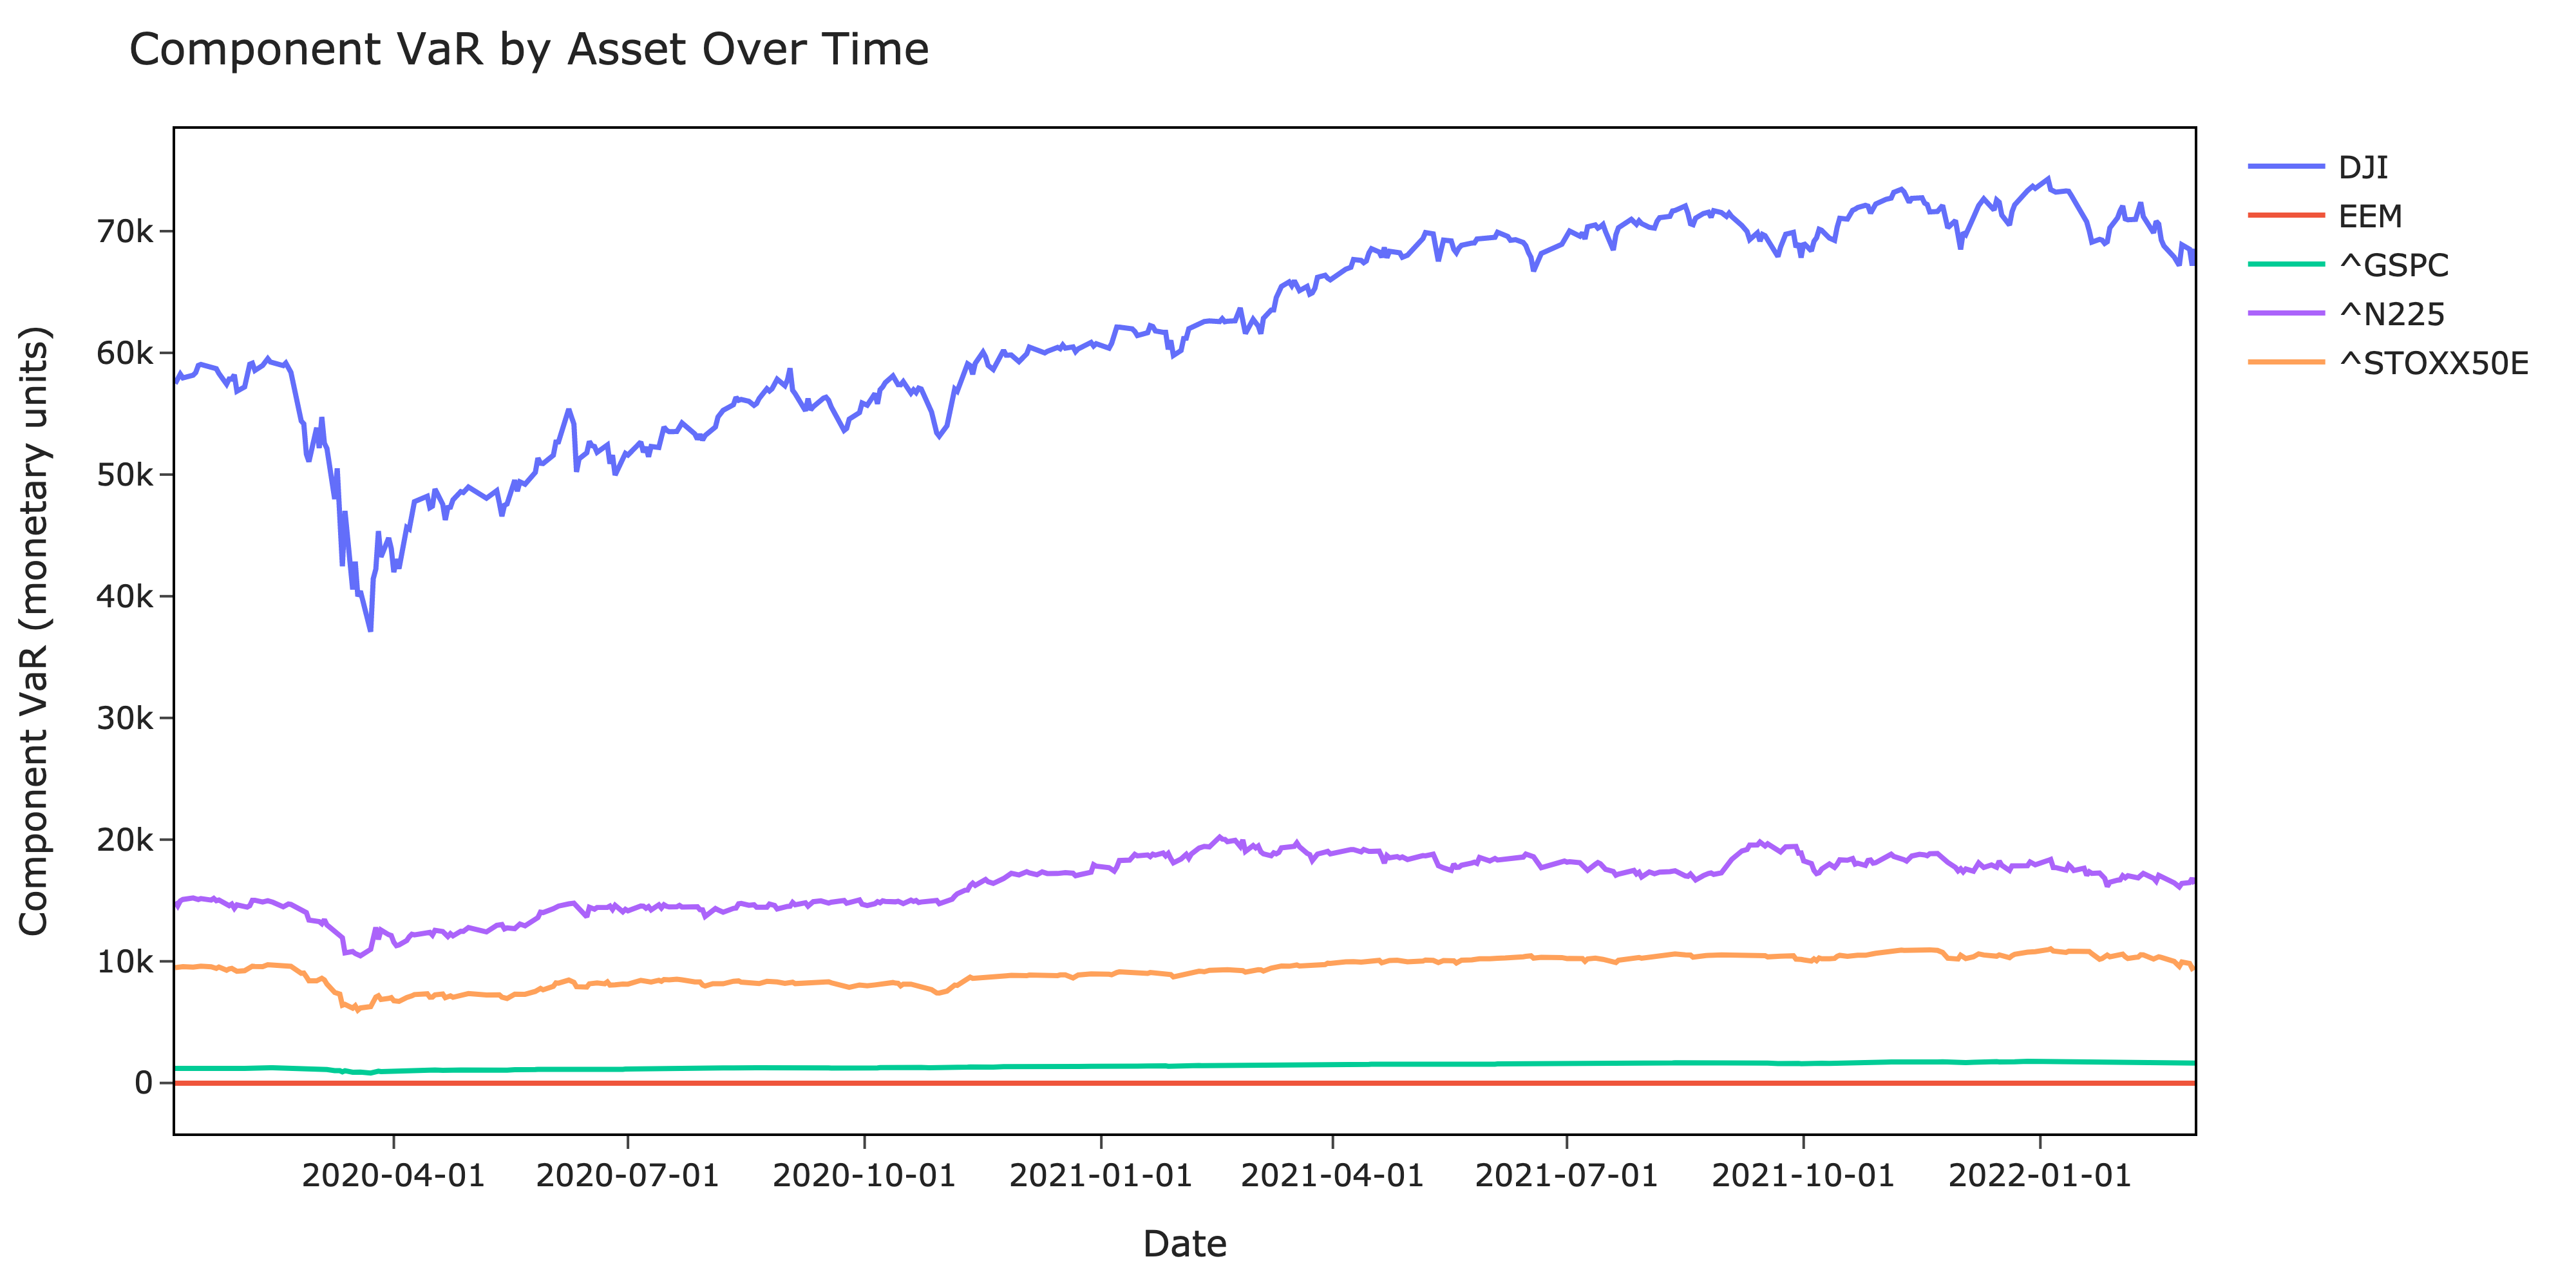

In [135]:
pl.plot_risk_contribution_lines(component_df, interactive=False)


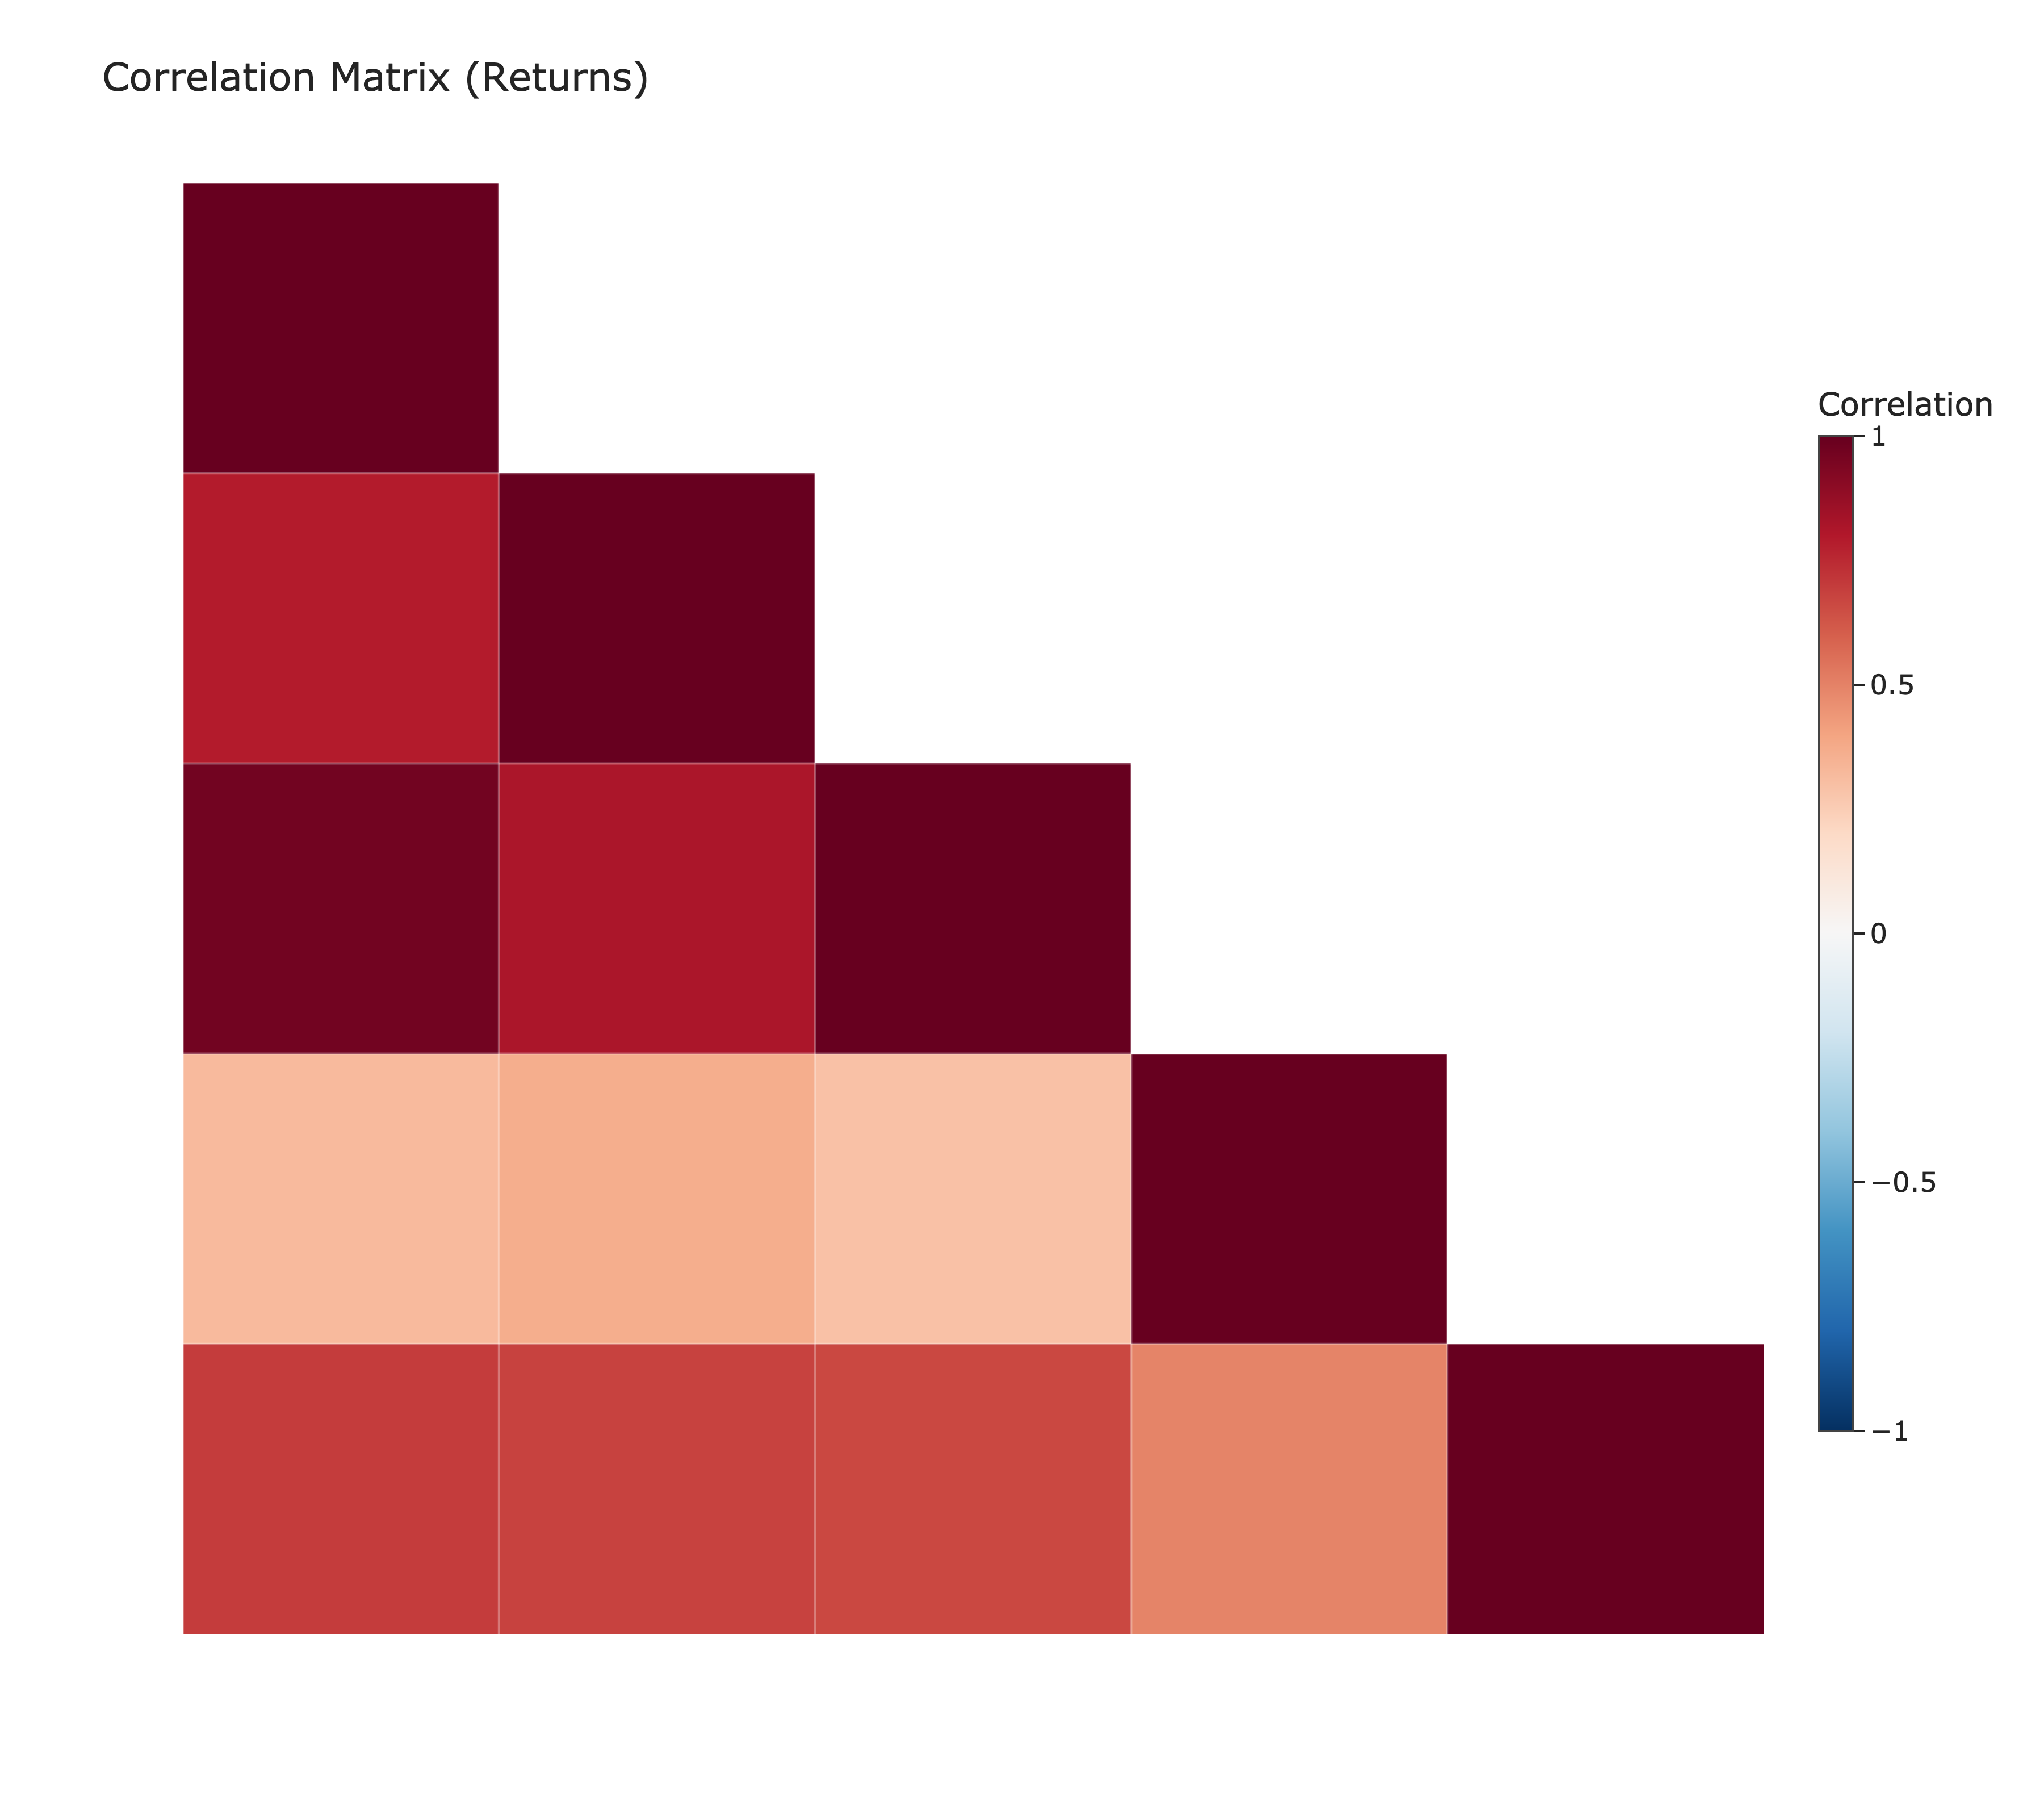

In [136]:
pl.plot_correlation_matrix(position_data, interactive=False)

---
### Appendix

- **Asset-Normal VaR (AN VaR)**  
  $$
  \text{VaR}_t = z_\alpha \cdot \sqrt{x_t^\top \Sigma x_t} \cdot \sqrt{h}
  $$

- **Undiversified VaR (UVaR)**  
  $$
  \text{UVaR}_t = z_\alpha \cdot \sum_{i=1}^N \sigma_i x_{i,t} \cdot \sqrt{h}
  $$

- **Marginal VaR**  
  $$
  \Delta \text{VaR}_{i,t} = \text{VaR}_t \cdot \frac{(\Sigma x_t)_i}{x_t^\top \Sigma x_t}
  $$

- **Component VaR**  
  $$
  \text{CVaR}_{i,t} = x_{i,t} \cdot \Delta \text{VaR}_{i,t}
  $$

- **Relative Component VaR**  
  $$
  \text{RCVaR}_{i,t} = \frac{\text{CVaR}_{i,t}}{\text{VaR}_t}
  $$

- **Incremental VaR**  
  $$
  \text{IVaR}_t = \Delta \text{VaR}_t^\top \cdot a
  $$

---

### Function Dependencies

```text
var_asset_normal()
 └── marginal_var()
      ├── component_var()
      │     └── relative_component_var()
      └── incremental_var()
```

---

### Notes
- All risk measures are in **monetary terms**.
- Covariance is based on returns inferred from time series of holdings.
- Inputs: matrix of monetary holdings, confidence level $z_\alpha$, and horizon $h$.